In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("data/breast_cancer_data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data=data.drop(["id","Unnamed: 32"],axis=1)

In [5]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [6]:
data["diagnosis"]=data["diagnosis"].map({'M':0,'B':1})

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.isna().sum()[data.isna().sum()>0]

Series([], dtype: int64)

In [9]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
float_col=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

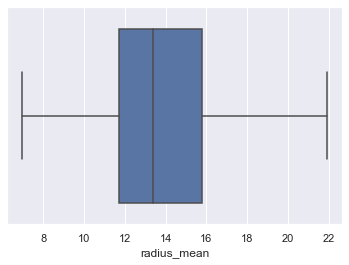

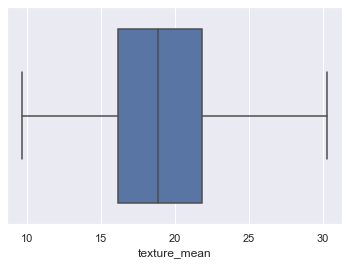

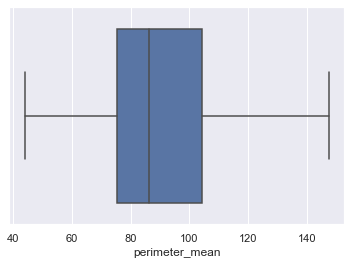

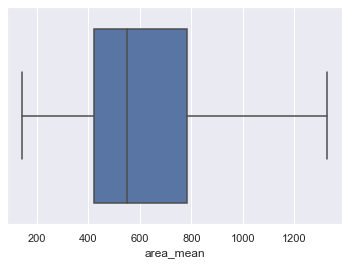

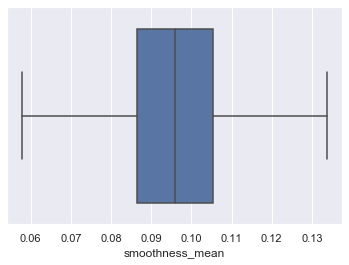

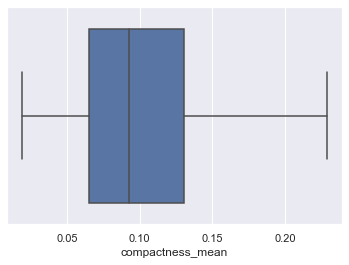

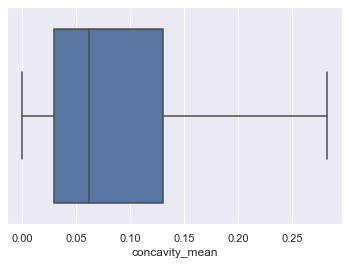

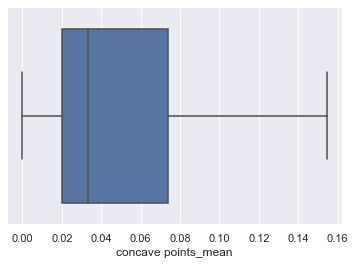

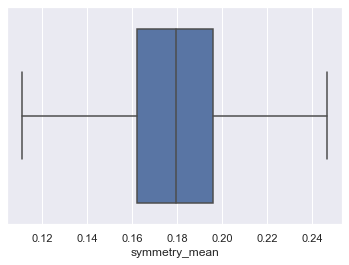

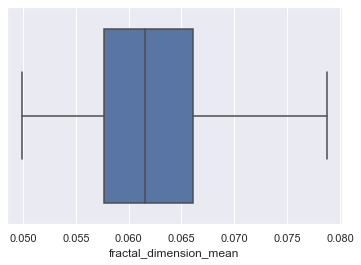

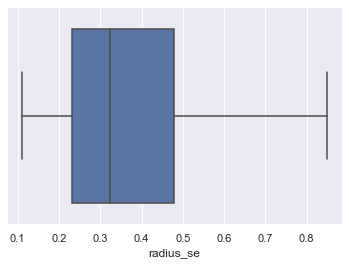

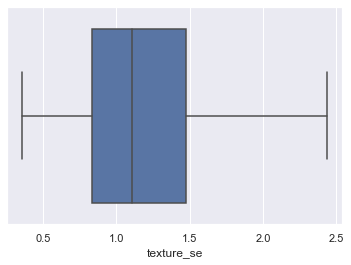

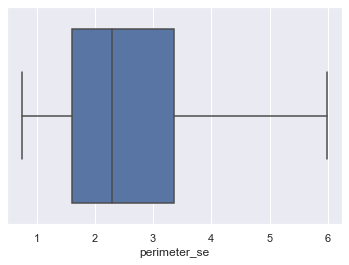

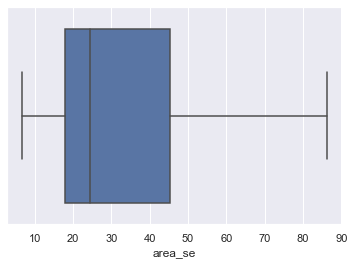

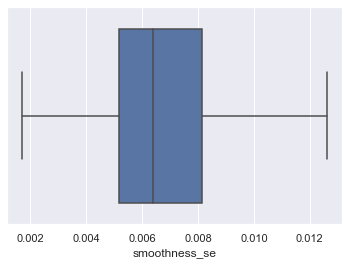

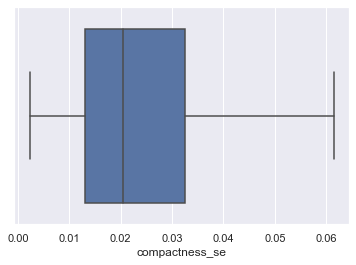

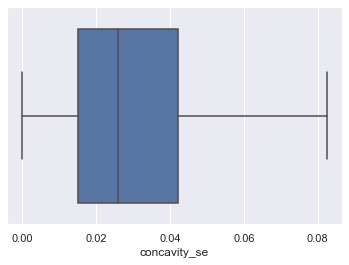

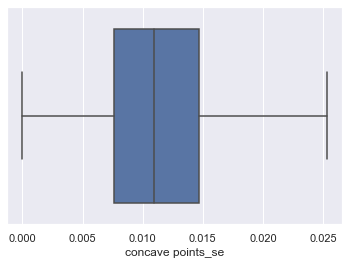

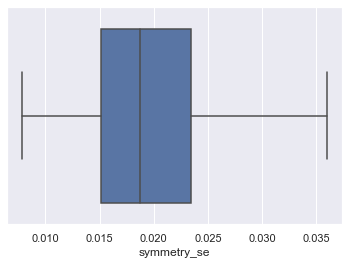

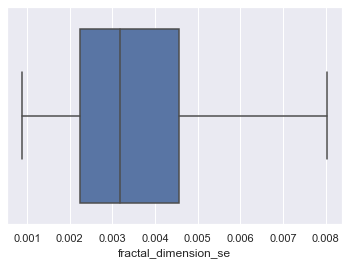

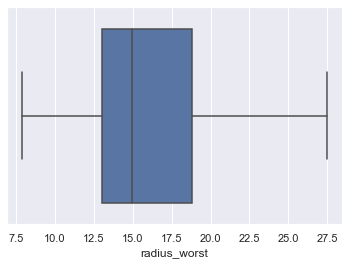

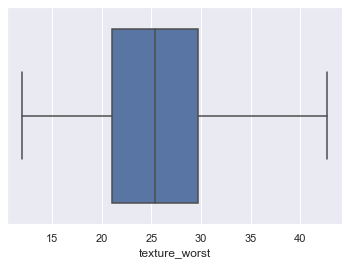

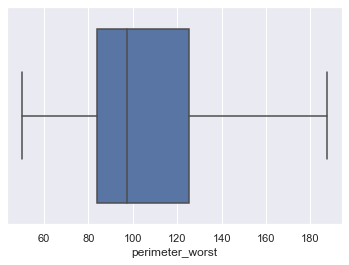

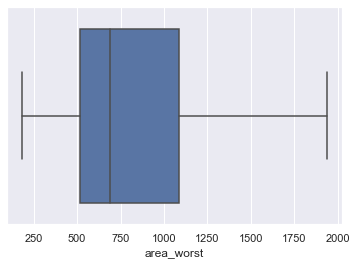

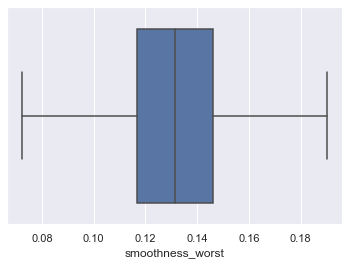

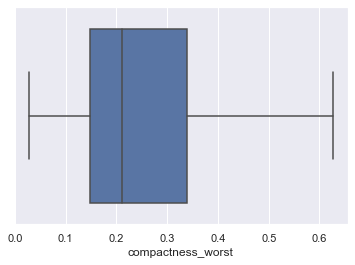

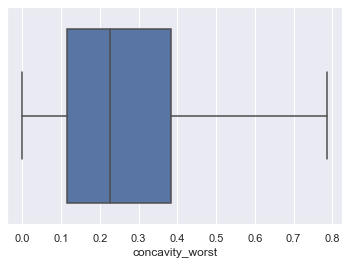

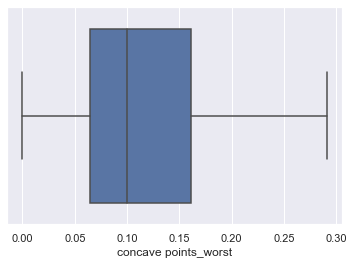

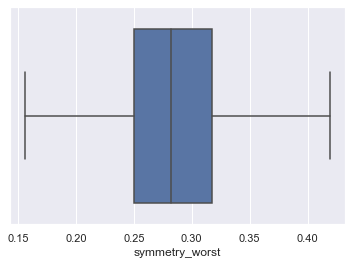

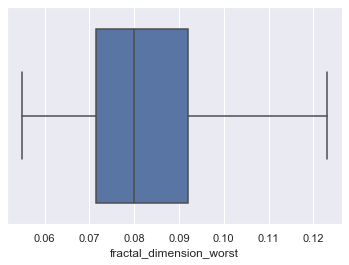

In [11]:
for i in float_col.columns:
    descr=data[i].describe()
    IQR=descr["75%"]-descr["25%"]
    upper=descr["75%"]+1.5*IQR
    lower=descr["25%"]-1.5*IQR
    data[i][data[i]>upper]=upper
    data[i][data[i]<lower]=lower
    sns.boxplot(data[i],orient="h")
    plt.show()

In [12]:
x=data.drop("diagnosis",axis=1)
y=data['diagnosis']

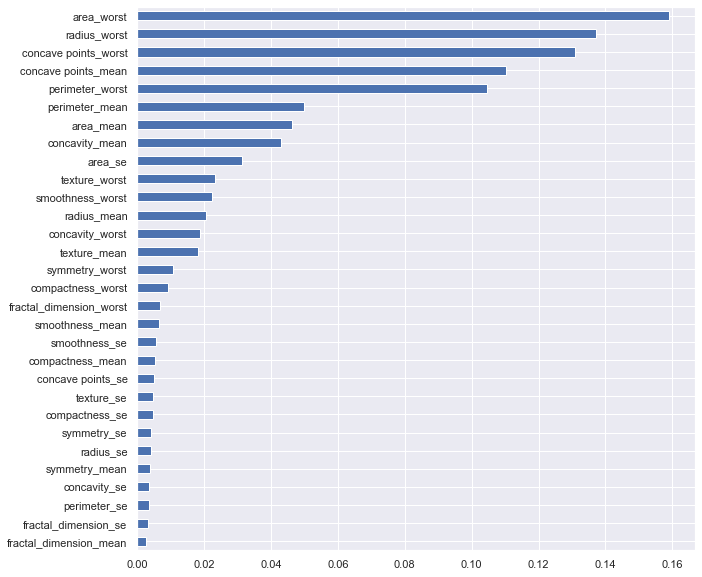

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model_feature=ExtraTreesRegressor()
model_feature.fit(x,y)

feat=pd.Series(index=x.columns,data=model_feature.feature_importances_).sort_values(ascending=True)
plt.figure(figsize=(10,10))
feat.plot(kind="barh")

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=.2,random_state=50)

## SIMPLE LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [17]:
model.score(xtest,ytest)

1.0

In [18]:
model.score(xtrain,ytrain)

0.9868131868131869

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

1.0

## LOGISTIC REGRESSION WITH HYPER PARAMETER TUNING

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [21]:
sovlver_values=["newton-cg","lbfgs","liblinear","sag","saga"]
penalty_values=["l1","l2","elasticnet","none"]
parameters={"solver":sovlver_values,"penalty":penalty_values}

In [22]:
classifier=GridSearchCV(model,parameters)
classifier.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
classifier.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
classifier.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
classifier=LogisticRegression(penalty='l1', solver='liblinear')
classifier.fit(xtrain,ytrain)
ypred_lasso=classifier.predict(xtest)

In [26]:
from sklearn import metrics
confusion_mat=metrics.confusion_matrix(ytest,ypred_lasso)
confusion_mat

array([[38,  1],
       [ 0, 75]], dtype=int64)

In [27]:
accuracy_score=metrics.accuracy_score(ytest,ypred_lasso)
accuracy_score

0.9912280701754386

## RIDGE CLASSIFIER

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

In [29]:
parameters={"alpha":[1e-15,1e-10,1e-5,1,3,4,5,6,7,8,9,10,11,30,50],"solver":["auto","svd"]}

In [30]:
ridge=RidgeClassifier()
ridge_classifier=GridSearchCV(ridge,parameters)
ridge_classifier.fit(xtrain,ytrain)
ridge_classifier.best_params_

{'alpha': 6, 'solver': 'auto'}

In [31]:
ridge=RidgeClassifier(alpha=6,solver='auto')
ridge.fit(xtrain,ytrain)


RidgeClassifier(alpha=6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [32]:
ypred_ridge=ridge.predict(xtest)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred_ridge)

array([[36,  3],
       [ 0, 75]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred_ridge)

0.9736842105263158